In [234]:
# LOD, dx
import numpy as np
from numpy import fft
from scipy import signal
import os
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
os.chdir(r'C:\a_sem_i\PiPG_I\temat_9')

In [2]:
import re
def my_replace(s,character=', '):
    '''Replace all runs of whitespace with a single dash'''
    
    s = re.sub("\s+", character, s)
    return s

def readfile(input_path,value_starts,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(', ')
            if wart[0] == value_starts:
                w.writelines(wart+['\n'])

In [252]:
def readfile(input_path,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            line = line[6:]
            wart = my_replace(line).split(',')
            k = 0
            for i in wart:
                if i.startswith(' I'):
                    i = i[2:]
                    wart[k] = ' ' + i
                k += 1
            w.writelines(wart+['\n'])

In [253]:
readfile('finals.data.iau2000.txt', 'out_data2.txt')

In [254]:
lod2, dx2 = np.loadtxt('out_data2.txt', usecols=(7,9), unpack=True)
lod2, lod
dx, dx2

(array([-0.086, -0.027,  0.014, ...,  0.371,  0.385,  0.385]),
 array([-0.086, -0.027,  0.014, ...,  0.371,  0.385,  0.385]))

In [25]:
def readfile2(input_path,value_to_change,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(',')
            if wart[0] == '':
                wart.remove('')
            k = 0
            for i in wart:
                if i.startswith(' I'):
                    i = i[2:]
                    wart[k] = ' ' + i
                k += 1
            if len(wart[0]) == 4:
                wart.insert(0, ' ' + wart[0][:2])
                wart.insert(1, ' ' + wart[1][2:])
                wart.pop(2)
                
            elif len(wart[0]) == 6:
                wart.insert(0, ' ' + wart[0][:2])
                wart.insert(1, ' ' + wart[1][2:4])
                wart.insert(2, ' ' + wart[2][4:])
                wart.pop(3)

            if len(wart[1]) > 3 and len(wart[1]) < 6:
                wart.insert(1, ' ' + wart[1][1])
                wart[2] = ' ' + wart[2][2:]
                
            if wart[0][0] == '9':
                wart[0]= '19' + wart[0]
            elif wart[0][0] == ' ':
                wart[0] = '200'+wart[0][-1]
            else:
                wart[0] = '20' + wart[0][0:2]
            if len(wart[1]) == 2:
                wart[1] = ' 0' + wart[1][-1]
            if len(wart[2]) == 2:
                wart[2] = ' 0' + wart[2][-1]
            w.writelines(wart+['\n'])

In [26]:
readfile2('finals.data.iau2000.txt', 'I', 'out_data.txt')

In [41]:
date = np.loadtxt('out_data.txt', usecols=(0,1,2), dtype = str)
''.join(date)
date = np.datetime64(date)
print(date)

# for b,c,d in zip(b,c,d):
#     date = np.datetime64(f'{b}-{c}-{d}')
#     print(date)

TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [50]:
from datetime import datetime, timedelta

t = np.arange(datetime(1992,1,1), datetime(2021,4,2), timedelta(days=1)).astype(datetime)
t.shape

(10684,)

In [247]:
lod, dx = np.loadtxt('out_data.txt', usecols=(10,12), unpack=True)
lod.shape, dx.shape

((10684,), (10684,))

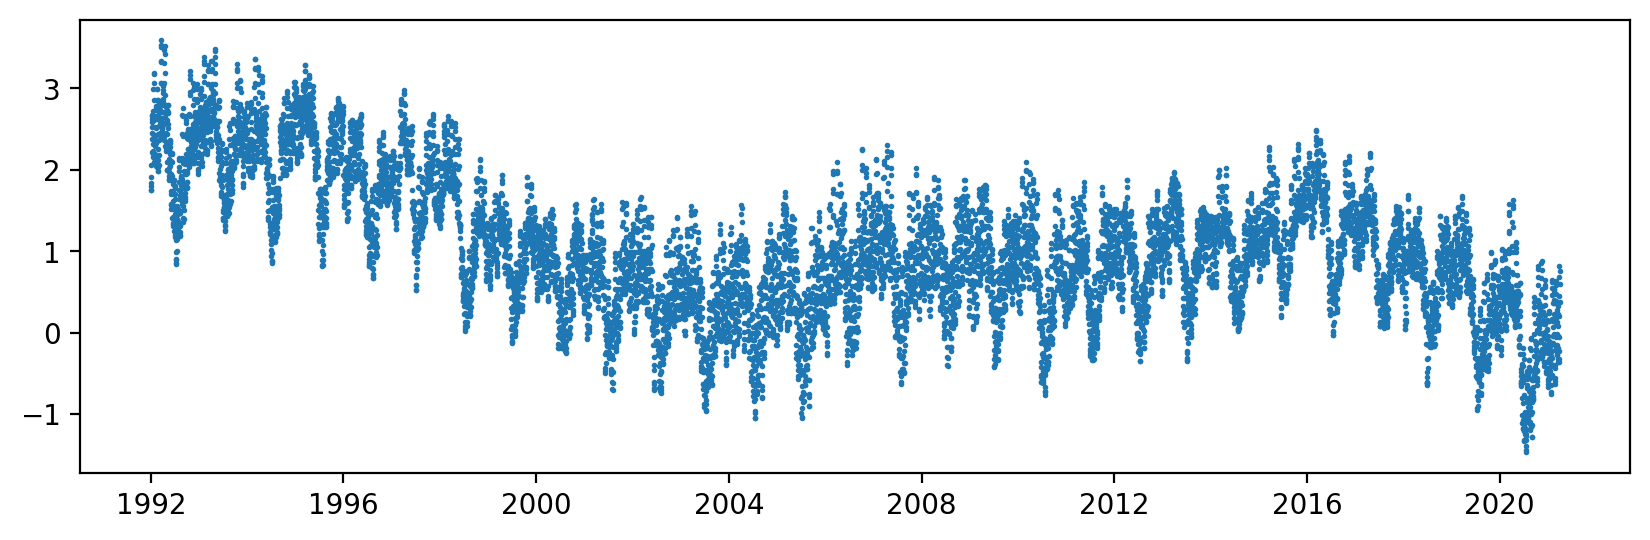

In [71]:
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s = 1)

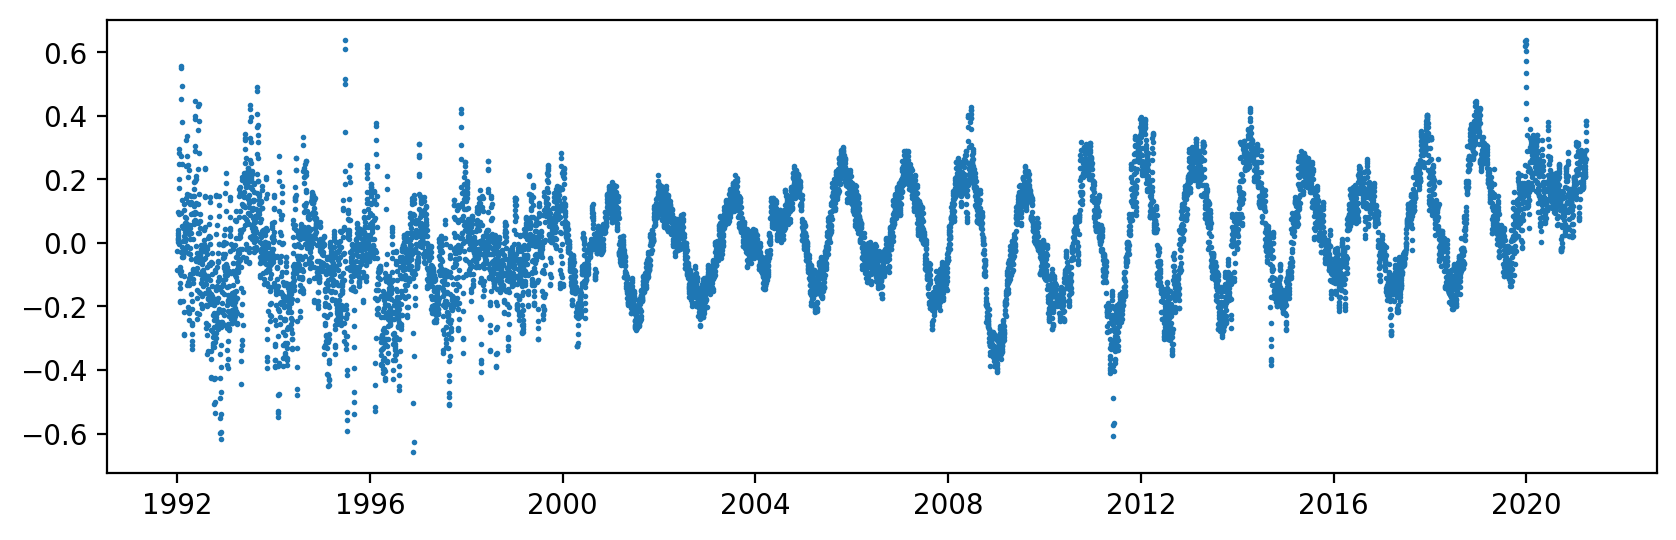

In [69]:
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,dx, s=1)

In [121]:
model = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y = lod

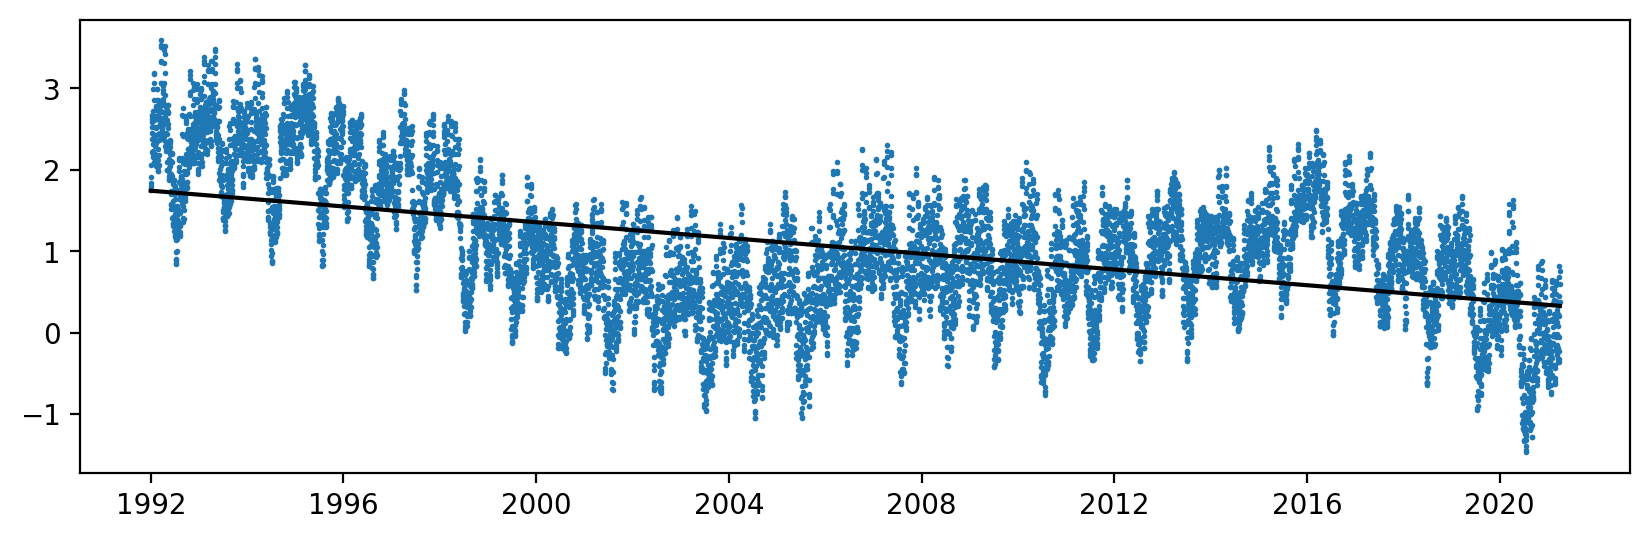

In [148]:
model.fit(x,y)
y_predict = model.predict(x)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s=1)
plt.plot(t, y_predict, '-k')

(array([   2,    4,    7, ..., 5334, 5338, 5341], dtype=int64), {})


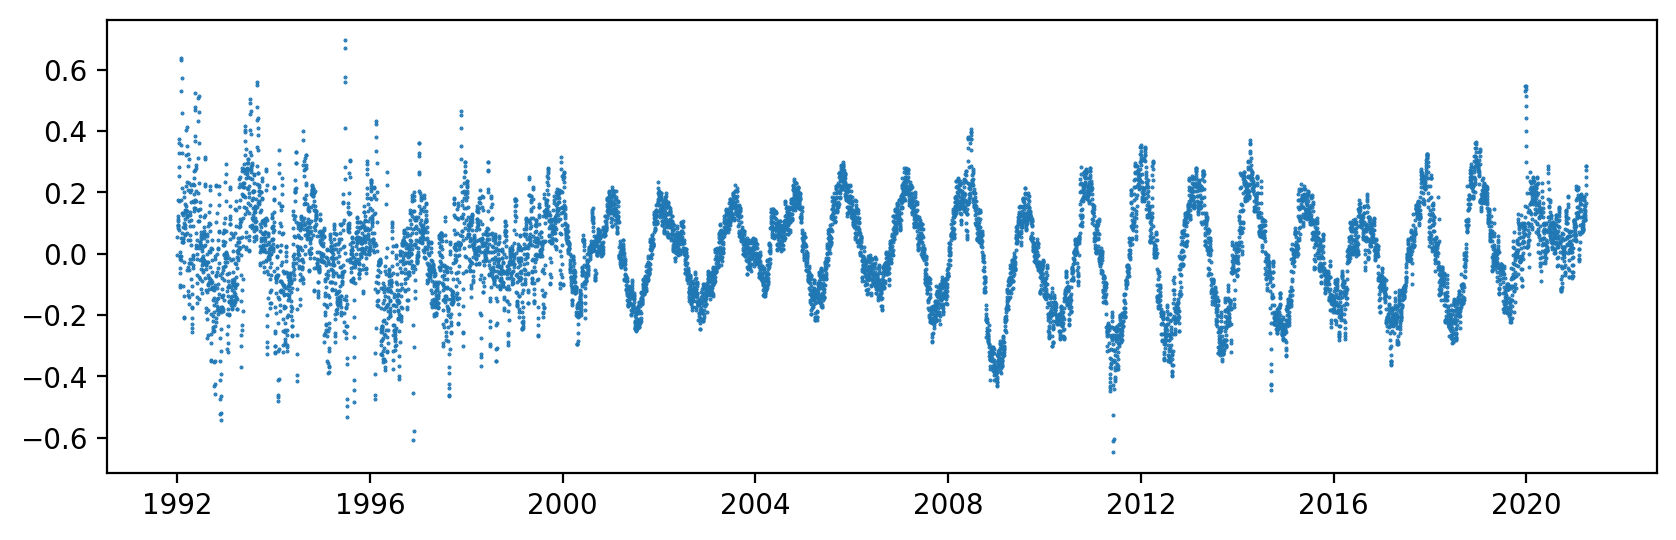

In [216]:
value = (y - y_predict)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t, value, s = 0.2)
#plt.hlines(0, colors = 'k',lw = 1)

[  2   4  14  24  27  29  31 782]


(0.01, 0.12)

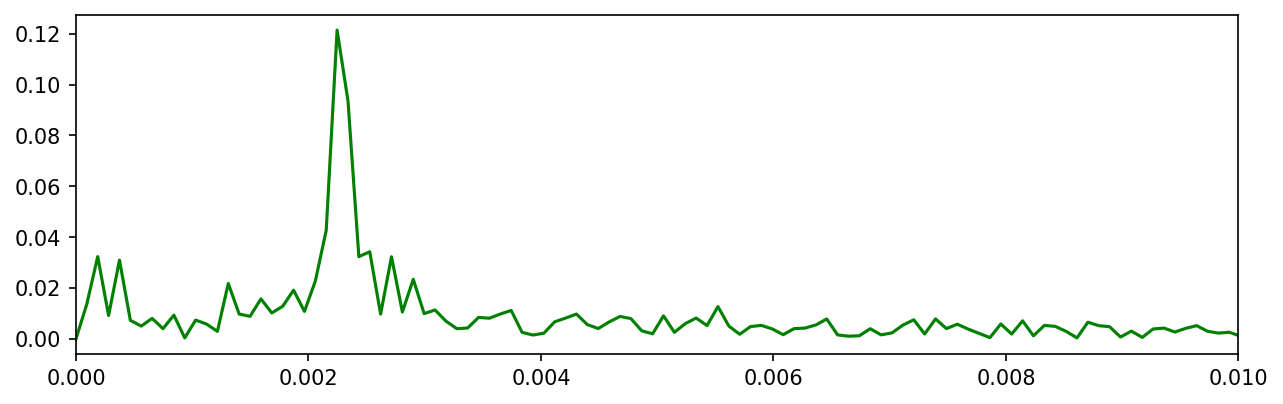

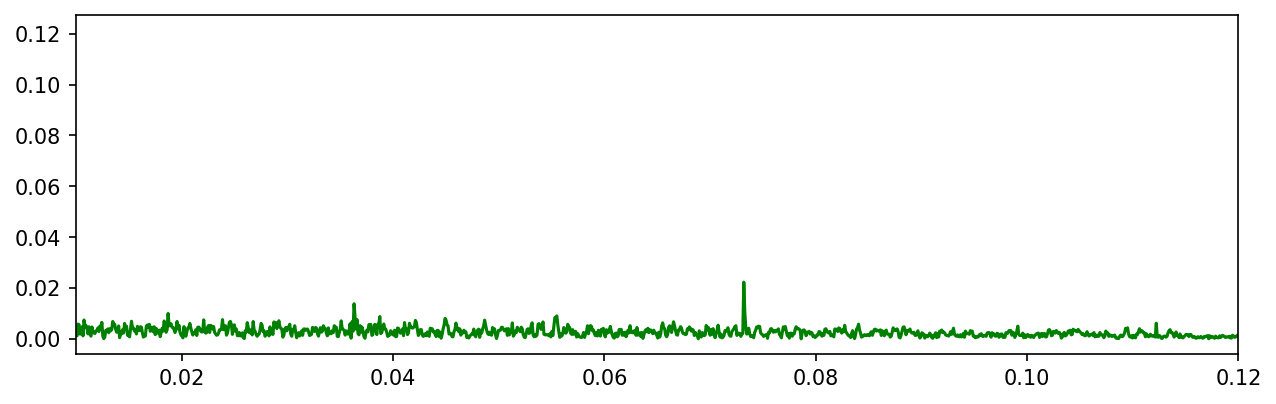

In [232]:
samples = len(y)
dt = 1 #day
f_trans = 2*abs(fft.rfft(value, axis = 0)) / samples
freq = fft.rfftfreq(len(value), dt)
print(signal.find_peaks(f_trans,0.02)[0])

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0, 0.01)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0.01, 0.12)

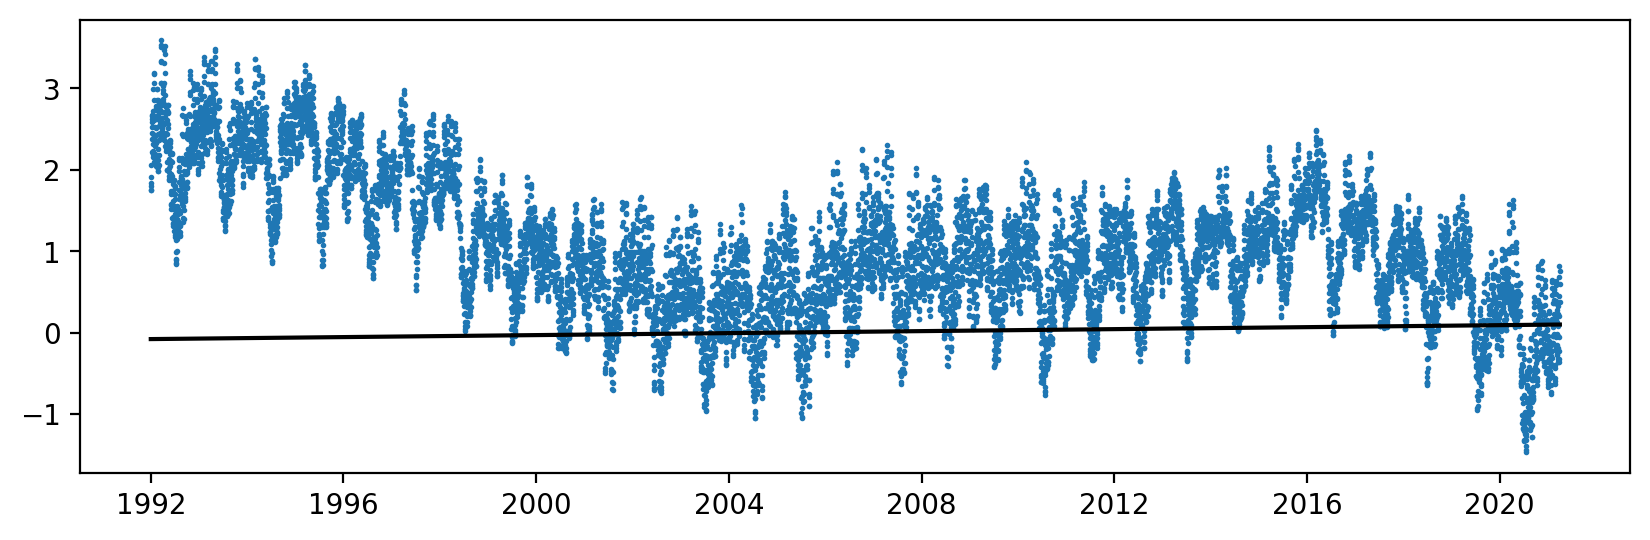

In [188]:
model = LinearRegression()
x = np.arange(1,len(t)+1).reshape(-1, 1)
y = dx

model.fit(x,y)
y_predict = model.predict(x)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t,lod, s=1)
plt.plot(t, y_predict, '-k')

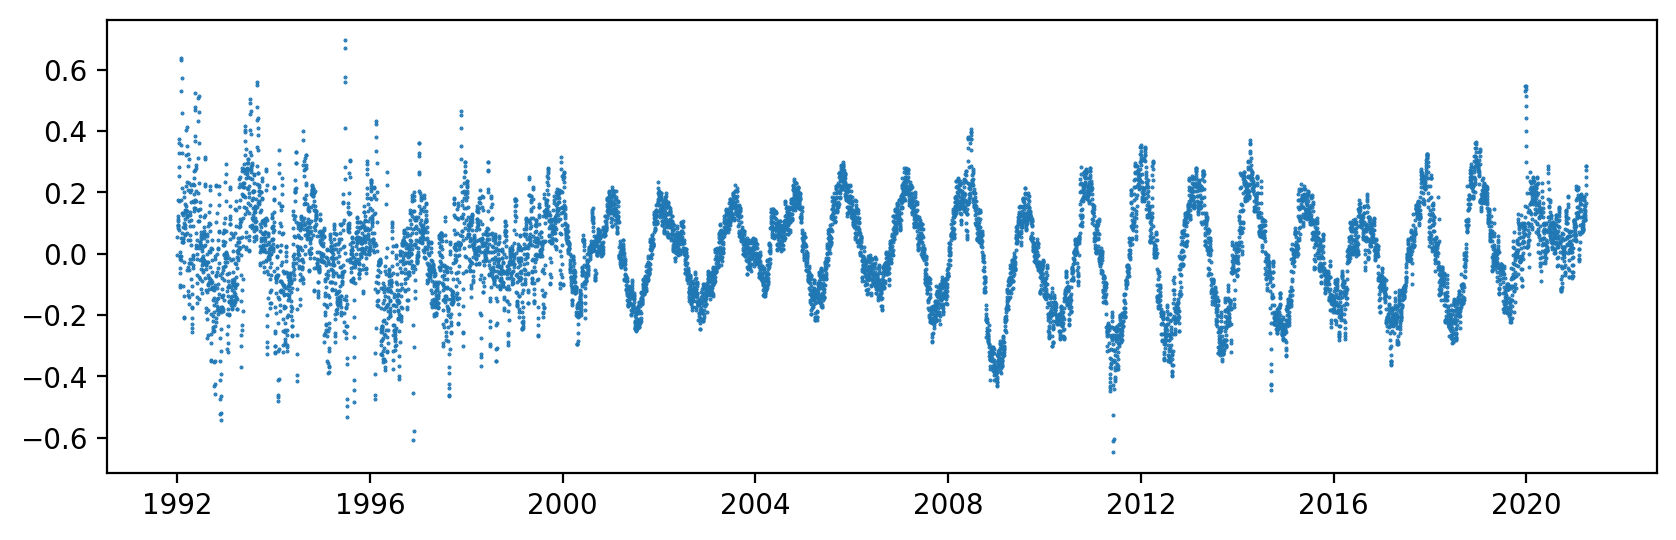

In [189]:
value = (y - y_predict)
fig = plt.figure(figsize=(10,3), dpi=200)
plt.scatter(t, value, s = 0.2)

(0.03, 0.08)

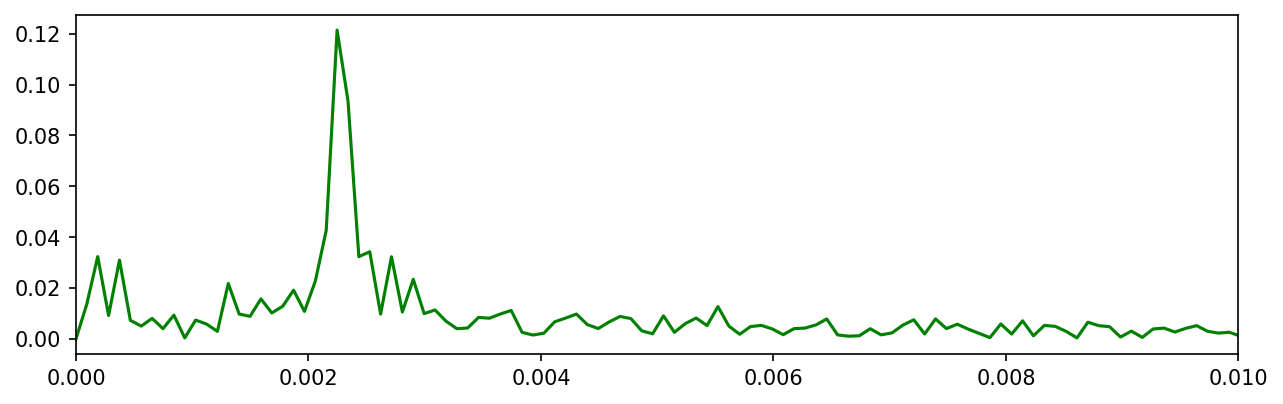

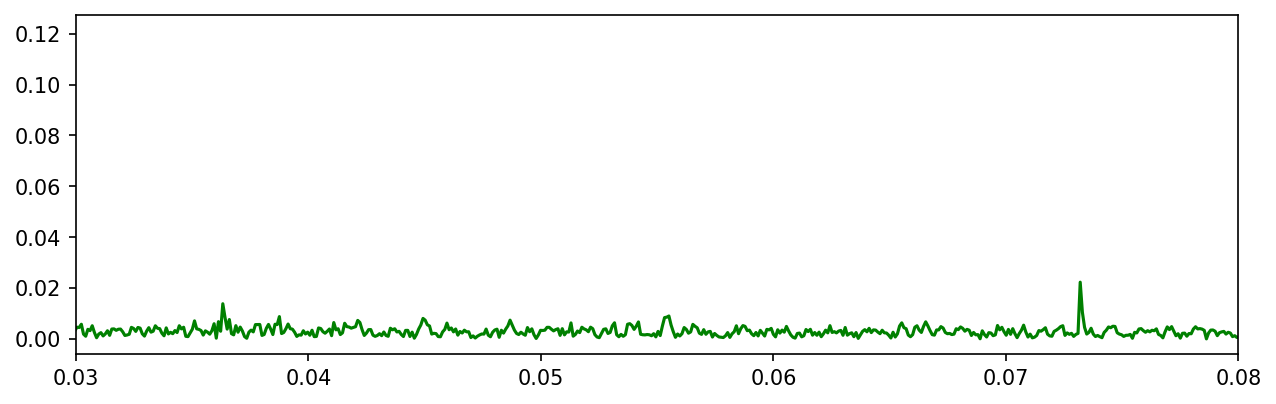

In [196]:
samples = len(y)
dt = 1 #day
f_trans = 2*abs(fft.rfft(value, axis = 0)) / samples
freq = fft.rfftfreq(len(value), dt)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0, 0.01)

fig = plt.figure(figsize=(10,3), dpi=150)
plt.plot(freq, f_trans, 'g')
plt.xlim(0.03, 0.08)

In [79]:
import numpy as np
import pandas as pd
import datetime
from sklearn import linear_model

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)
index = pd.date_range(start, end)
index, len(index)

(DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10',
                ...
                '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
                '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
                '2020-12-30', '2020-12-31'],
               dtype='datetime64[ns]', length=366, freq='D'),
 366)

In [80]:
multiple = 5
l = list(range(0, len(index)*multiple, multiple))
df = pd.DataFrame(l, index = index)
df.index.name = "date"
df.columns = ["value"]
df

,value
date,
2020-01-01,0
2020-01-02,5
2020-01-03,10
2020-01-04,15
2020-01-05,20
...,...
2020-12-27,1805
2020-12-28,1810
2020-12-29,1815


In [81]:
df['days_from_start'] = (df.index - df.index[0]).days; df

,value,days_from_start
date,,
2020-01-01,0,0
2020-01-02,5,1
2020-01-03,10,2
2020-01-04,15,3
2020-01-05,20,4
...,...,...
2020-12-27,1805,361
2020-12-28,1810,362
2020-12-29,1815,363


In [82]:
x = df['days_from_start'].values.reshape(-1, 1)
y = df['value'].values

In [83]:
model = linear_model.LinearRegression().fit(x, y)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.predict([[1], [7], [50]])

array([  5.,  35., 250.])

In [113]:
from datetime import datetime

t_start = datetime(1992,1,1)
t_stop = datetime(2021,4,2)
delta = t_stop-t_start
delta.seconds 

0